## 1. Import Required Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    roc_curve, precision_recall_curve, f1_score, accuracy_score,
    precision_score, recall_score
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# Class Imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore the Data

In [2]:
# Load datasets
train_df = pd.read_csv('train_transaction.csv')
test_df = pd.read_csv('test_transaction.csv')

print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)
print("\n" + "="*50)
print("First few rows of training data:")
train_df.head()

Training data shape: (590540, 394)
Test data shape: (506691, 393)

First few rows of training data:


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# Basic information about the dataset
print("Training Data Information:")
print(train_df.info())
print("\n" + "="*50)
print("Statistical Summary:")
train_df.describe()

Training Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB
None

Statistical Summary:


,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


Target Variable Distribution:
isFraud
0    569877
1     20663
Name: count, dtype: int64

Percentage Distribution:
isFraud
0    96.500999
1     3.499001
Name: proportion, dtype: float64


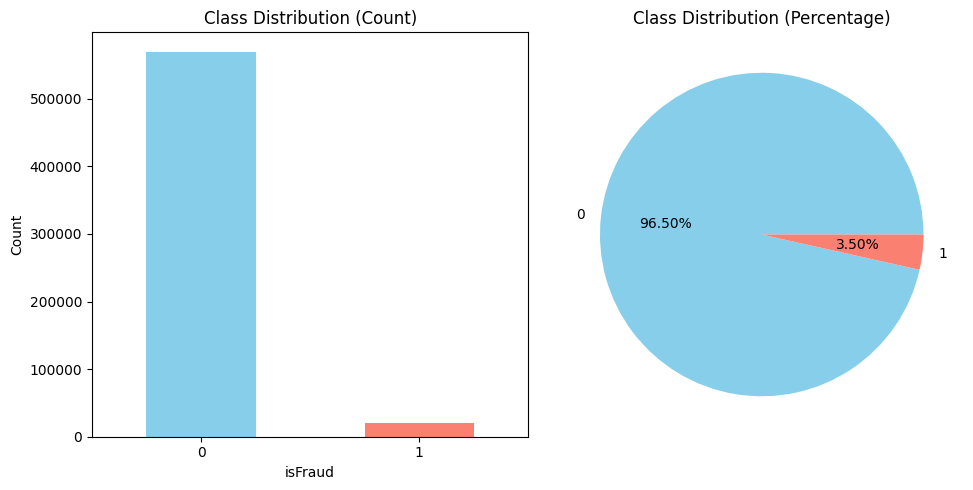


Fraud Ratio: 0.0350 (3.50%)
Imbalance Ratio: 1:28


In [4]:
# Check target variable distribution
print("Target Variable Distribution:")
print(train_df['isFraud'].value_counts())
print("\nPercentage Distribution:")
print(train_df['isFraud'].value_counts(normalize=True) * 100)

# Visualize class distribution
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
train_df['isFraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution (Count)')
plt.xlabel('isFraud')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
train_df['isFraud'].value_counts().plot(kind='pie', autopct='%1.2f%%', colors=['skyblue', 'salmon'])
plt.title('Class Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

# Calculate class imbalance ratio
fraud_ratio = train_df['isFraud'].sum() / len(train_df)
print(f"\nFraud Ratio: {fraud_ratio:.4f} ({fraud_ratio*100:.2f}%)")
print(f"Imbalance Ratio: 1:{int(1/fraud_ratio)}")

## 3. Data Cleaning and Preprocessing

Missing Values in Training Data:
       Missing Count  Percentage
dist2         552913   93.628374
D7            551623   93.409930
D13           528588   89.509263
D14           528353   89.469469
D12           525823   89.041047
D6            517353   87.606767
D8            515614   87.312290
D9            515614   87.312290
V154          508595   86.123717
V153          508595   86.123717
V162          508595   86.123717
V161          508595   86.123717
V163          508595   86.123717
V155          508595   86.123717
V156          508595   86.123717
V138          508595   86.123717
V142          508595   86.123717
V149          508595   86.123717
V148          508595   86.123717
V147          508595   86.123717


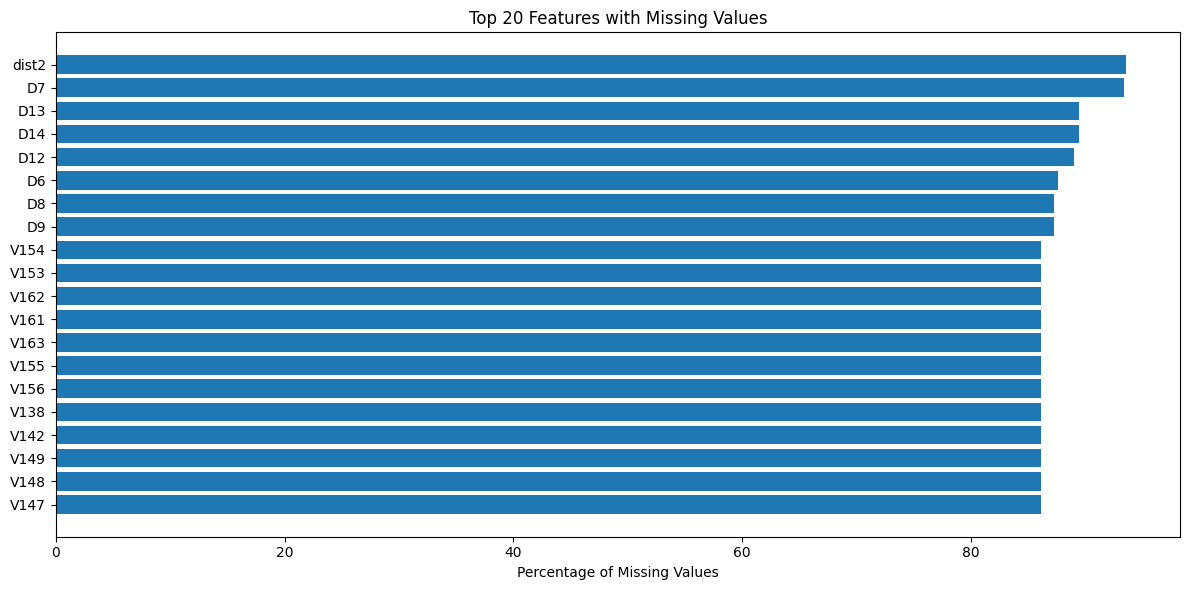

In [5]:
# Check for missing values
print("Missing Values in Training Data:")
missing_train = train_df.isnull().sum()
missing_train_pct = (missing_train / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_train,
    'Percentage': missing_train_pct
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df.head(20))

# Visualize missing values
if len(missing_df) > 0:
    plt.figure(figsize=(12, 6))
    top_missing = missing_df.head(20)
    plt.barh(range(len(top_missing)), top_missing['Percentage'])
    plt.yticks(range(len(top_missing)), top_missing.index)
    plt.xlabel('Percentage of Missing Values')
    plt.title('Top 20 Features with Missing Values')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

In [6]:
# Separate features and target
X = train_df.drop(['isFraud', 'TransactionID'], axis=1, errors='ignore')
y = train_df['isFraud']

# Store TransactionID for test data
test_ids = test_df['TransactionID'] if 'TransactionID' in test_df.columns else None
X_test = test_df.drop(['TransactionID'], axis=1, errors='ignore')

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Test features shape: {X_test.shape}")

Features shape: (590540, 392)
Target shape: (590540,)
Test features shape: (506691, 392)


In [7]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Number of categorical features: {len(categorical_cols)}")
print(f"Number of numerical features: {len(numerical_cols)}")
print(f"\nCategorical features: {categorical_cols[:10]}...") if len(categorical_cols) > 10 else print(f"\nCategorical features: {categorical_cols}")
print(f"\nNumerical features: {numerical_cols[:10]}...") if len(numerical_cols) > 10 else print(f"\nNumerical features: {numerical_cols}")

Number of categorical features: 14
Number of numerical features: 378

Categorical features: ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5']...

Numerical features: ['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'addr1', 'addr2', 'dist1', 'dist2']...


## 4. Feature Engineering and Selection

In [8]:
# Function to preprocess data
def preprocess_data(df_train, df_test, categorical_features, numerical_features):
    """
    Preprocess training and test data:
    1. Handle categorical variables (Label Encoding)
    2. Handle missing values (Imputation)
    3. Feature scaling (Standardization)
    """
    # Make copies
    train_processed = df_train.copy()
    test_processed = df_test.copy()
    
    # 1. Encode categorical variables
    label_encoders = {}
    for col in categorical_features:
        if col in train_processed.columns:
            le = LabelEncoder()
            # Fit on train data
            train_processed[col] = train_processed[col].fillna('missing')
            le.fit(train_processed[col].astype(str))
            train_processed[col] = le.transform(train_processed[col].astype(str))
            
            # Transform test data (handle unseen labels)
            if col in test_processed.columns:
                test_processed[col] = test_processed[col].fillna('missing')
                test_processed[col] = test_processed[col].astype(str).apply(
                    lambda x: x if x in le.classes_ else 'missing'
                )
                test_processed[col] = le.transform(test_processed[col])
            
            label_encoders[col] = le
    
    # 2. Handle missing values in numerical features
    imputer = SimpleImputer(strategy='median')
    
    if len(numerical_features) > 0:
        train_processed[numerical_features] = imputer.fit_transform(train_processed[numerical_features])
        test_processed[numerical_features] = imputer.transform(test_processed[numerical_features])
    
    # 3. Feature scaling
    scaler = StandardScaler()
    
    if len(numerical_features) > 0:
        train_processed[numerical_features] = scaler.fit_transform(train_processed[numerical_features])
        test_processed[numerical_features] = scaler.transform(test_processed[numerical_features])
    
    return train_processed, test_processed, label_encoders, imputer, scaler

# Apply preprocessing
X_processed, X_test_processed, encoders, imputer, scaler = preprocess_data(
    X, X_test, categorical_cols, numerical_cols
)

print("Preprocessing completed!")
print(f"Processed training features shape: {X_processed.shape}")
print(f"Processed test features shape: {X_test_processed.shape}")

Preprocessing completed!
Processed training features shape: (590540, 392)
Processed test features shape: (506691, 392)


In [9]:
# Feature selection - Remove features with too many missing values or low variance
# Calculate missing percentage before preprocessing
missing_pct = (X.isnull().sum() / len(X)) * 100
high_missing_cols = missing_pct[missing_pct > 80].index.tolist()

print(f"Features with >80% missing values: {len(high_missing_cols)}")

# Drop high missing columns
if len(high_missing_cols) > 0:
    X_processed = X_processed.drop(high_missing_cols, axis=1, errors='ignore')
    X_test_processed = X_test_processed.drop(high_missing_cols, axis=1, errors='ignore')
    print(f"After removing high missing features: {X_processed.shape}")

Features with >80% missing values: 55
After removing high missing features: (590540, 337)


## 5. Train-Validation Split

In [10]:
# Split the data
X_train, X_val, y_train, y_val = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"\nTraining set fraud distribution:\n{y_train.value_counts()}")
print(f"\nValidation set fraud distribution:\n{y_val.value_counts()}")

Training set size: (472432, 337)
Validation set size: (118108, 337)

Training set fraud distribution:
isFraud
0    455902
1     16530
Name: count, dtype: int64

Validation set fraud distribution:
isFraud
0    113975
1      4133
Name: count, dtype: int64


## 6. Handle Class Imbalance with SMOTE

In [11]:
# Apply SMOTE to balance the training data
print("Applying SMOTE to balance the training data...")
print(f"Before SMOTE - Training set: {X_train.shape}, Fraud cases: {y_train.sum()}")

smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"After SMOTE - Training set: {X_train_balanced.shape}, Fraud cases: {y_train_balanced.sum()}")
print(f"\nClass distribution after SMOTE:\n{pd.Series(y_train_balanced).value_counts()}")

Applying SMOTE to balance the training data...
Before SMOTE - Training set: (472432, 337), Fraud cases: 16530
After SMOTE - Training set: (911804, 337), Fraud cases: 455902

Class distribution after SMOTE:
isFraud
0    455902
1    455902
Name: count, dtype: int64


## 7. Machine Learning Models

In [12]:
# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Train and evaluate a model, returning metrics and predictions
    """
    print(f"\n{'='*60}")
    print(f"Training {model_name}...")
    print(f"{'='*60}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-Score:  {f1:.4f}")
    print(f"ROC-AUC:   {roc_auc:.4f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    print(f"\nConfusion Matrix:")
    print(cm)
    
    return {
        'model': model,
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'confusion_matrix': cm
    }

### 7.1 Logistic Regression

In [13]:
# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)
lr_results = evaluate_model(lr_model, X_train_balanced, y_train_balanced, X_val, y_val, "Logistic Regression")


Training Logistic Regression...

Logistic Regression Results:
Accuracy:  0.8215
Precision: 0.1255
Recall:    0.6874
F1-Score:  0.2123
ROC-AUC:   0.8376

Confusion Matrix:
[[94184 19791]
 [ 1292  2841]]


### 7.2 Random Forest

In [14]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_results = evaluate_model(rf_model, X_train_balanced, y_train_balanced, X_val, y_val, "Random Forest")


Training Random Forest...

Random Forest Results:
Accuracy:  0.9245
Precision: 0.2616
Recall:    0.6349
F1-Score:  0.3705
ROC-AUC:   0.8831

Confusion Matrix:
[[106569   7406]
 [  1509   2624]]


### 7.3 XGBoost

In [ ]:
# XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    eval_metric='logloss'
)
xgb_results = evaluate_model(xgb_model, X_train_balanced, y_train_balanced, X_val, y_val, "XGBoost")

### 7.4 LightGBM

In [ ]:
# LightGBM
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)
lgbm_results = evaluate_model(lgbm_model, X_train_balanced, y_train_balanced, X_val, y_val, "LightGBM")

## 8. Deep Learning Model

In [ ]:
# Build Neural Network
def build_neural_network(input_dim):
    model = models.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', keras.metrics.AUC(name='auc'), 
                 keras.metrics.Precision(name='precision'),
                 keras.metrics.Recall(name='recall')]
    )
    
    return model

# Create the model
nn_model = build_neural_network(X_train_balanced.shape[1])
nn_model.summary()

In [ ]:
# Define callbacks
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

# Train the model
print("Training Neural Network...")
history = nn_model.fit(
    X_train_balanced, y_train_balanced,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

In [ ]:
# Plot training history
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Loss
axes[0, 0].plot(history.history['loss'], label='Train Loss')
axes[0, 0].plot(history.history['val_loss'], label='Val Loss')
axes[0, 0].set_title('Model Loss')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy
axes[0, 1].plot(history.history['accuracy'], label='Train Accuracy')
axes[0, 1].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0, 1].set_title('Model Accuracy')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].legend()
axes[0, 1].grid(True)

# AUC
axes[1, 0].plot(history.history['auc'], label='Train AUC')
axes[1, 0].plot(history.history['val_auc'], label='Val AUC')
axes[1, 0].set_title('Model AUC')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('AUC')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Precision & Recall
axes[1, 1].plot(history.history['precision'], label='Train Precision')
axes[1, 1].plot(history.history['val_precision'], label='Val Precision')
axes[1, 1].plot(history.history['recall'], label='Train Recall')
axes[1, 1].plot(history.history['val_recall'], label='Val Recall')
axes[1, 1].set_title('Precision & Recall')
axes[1, 1].set_xlabel('Epoch')
axes[1, 1].set_ylabel('Score')
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate Neural Network
print("\n" + "="*60)
print("Evaluating Neural Network...")
print("="*60)

# Predictions
y_pred_nn_proba = nn_model.predict(X_val).flatten()
y_pred_nn = (y_pred_nn_proba > 0.5).astype(int)

# Calculate metrics
nn_accuracy = accuracy_score(y_val, y_pred_nn)
nn_precision = precision_score(y_val, y_pred_nn)
nn_recall = recall_score(y_val, y_pred_nn)
nn_f1 = f1_score(y_val, y_pred_nn)
nn_roc_auc = roc_auc_score(y_val, y_pred_nn_proba)

print(f"\nNeural Network Results:")
print(f"Accuracy:  {nn_accuracy:.4f}")
print(f"Precision: {nn_precision:.4f}")
print(f"Recall:    {nn_recall:.4f}")
print(f"F1-Score:  {nn_f1:.4f}")
print(f"ROC-AUC:   {nn_roc_auc:.4f}")

# Confusion Matrix
nn_cm = confusion_matrix(y_val, y_pred_nn)
print(f"\nConfusion Matrix:")
print(nn_cm)

# Store results
nn_results = {
    'model': nn_model,
    'model_name': 'Neural Network',
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1,
    'roc_auc': nn_roc_auc,
    'y_pred': y_pred_nn,
    'y_pred_proba': y_pred_nn_proba,
    'confusion_matrix': nn_cm
}

## 9. Model Comparison

In [ ]:
# Compile all results
all_results = [lr_results, rf_results, xgb_results, lgbm_results, nn_results]

# Create comparison dataframe
comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Accuracy': result['accuracy'],
        'Precision': result['precision'],
        'Recall': result['recall'],
        'F1-Score': result['f1_score'],
        'ROC-AUC': result['roc_auc']
    }
    for result in all_results
])

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("\n" + "="*80)

# Find best model
best_model_idx = comparison_df['ROC-AUC'].idxmax()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
print(f"\nBest Model (by ROC-AUC): {best_model_name}")
print(f"ROC-AUC Score: {comparison_df.loc[best_model_idx, 'ROC-AUC']:.4f}")

In [ ]:
# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for idx, metric in enumerate(metrics):
    row = idx // 3
    col = idx % 3
    
    axes[row, col].bar(comparison_df['Model'], comparison_df[metric], color='steelblue')
    axes[row, col].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel(metric)
    axes[row, col].set_ylim([0, 1])
    axes[row, col].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for i, v in enumerate(comparison_df[metric]):
        axes[row, col].text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontsize=9)

# Hide the last subplot
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

## 10. ROC Curve Comparison

In [ ]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 8))

for result in all_results:
    fpr, tpr, _ = roc_curve(y_val, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f"{result['model_name']} (AUC = {result['roc_auc']:.3f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - All Models', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 11. Confusion Matrix Visualization

In [ ]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, result in enumerate(all_results):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues', 
                ax=axes[idx], cbar=False)
    axes[idx].set_title(f"{result['model_name']}\n(F1={result['f1_score']:.3f})", 
                        fontweight='bold')
    axes[idx].set_ylabel('True Label')
    axes[idx].set_xlabel('Predicted Label')

# Hide the last subplot
axes[5].axis('off')

plt.tight_layout()
plt.show()

## 12. Feature Importance (for Tree-based Models)

In [ ]:
# Plot feature importance for Random Forest
feature_names = X_processed.columns

# Get feature importance from Random Forest
rf_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_results['model'].feature_importances_
}).sort_values('importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(12, 8))
top_features = rf_importance.head(20)
plt.barh(range(len(top_features)), top_features['importance'])
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("Top 20 Most Important Features:")
print(rf_importance.head(20))

## 13. Generate Predictions on Test Data

In [ ]:
# Select the best model (based on ROC-AUC)
best_result = all_results[best_model_idx]
best_model = best_result['model']

print(f"Using {best_result['model_name']} for final predictions...")

# Generate predictions on test data
if isinstance(best_model, keras.Model):
    # Neural Network predictions
    test_predictions = best_model.predict(X_test_processed).flatten()
else:
    # ML model predictions
    test_predictions = best_model.predict_proba(X_test_processed)[:, 1]

print(f"Generated {len(test_predictions)} predictions")
print(f"Prediction range: [{test_predictions.min():.4f}, {test_predictions.max():.4f}]")
print(f"Mean prediction: {test_predictions.mean():.4f}")

In [ ]:
# Create submission file
submission_df = pd.DataFrame({
    'TransactionID': test_ids if test_ids is not None else range(len(test_predictions)),
    'isFraud': test_predictions
})

# Save to CSV
submission_df.to_csv('fraud_detection_submission.csv', index=False)
print("\nSubmission file saved as 'fraud_detection_submission.csv'")
print("\nFirst few predictions:")
print(submission_df.head(10))

## 14. Summary and Conclusions

In [ ]:
print("\n" + "="*80)
print("FRAUD DETECTION PROJECT SUMMARY")
print("="*80)
print(f"\n1. Dataset Statistics:")
print(f"   - Training samples: {len(train_df)}")
print(f"   - Test samples: {len(test_df)}")
print(f"   - Original features: {len(X.columns)}")
print(f"   - Processed features: {len(X_processed.columns)}")
print(f"   - Fraud rate in training: {(y.sum()/len(y)*100):.2f}%")

print(f"\n2. Models Evaluated:")
for i, result in enumerate(all_results, 1):
    print(f"   {i}. {result['model_name']}")

print(f"\n3. Best Model: {best_model_name}")
print(f"   - ROC-AUC: {comparison_df.loc[best_model_idx, 'ROC-AUC']:.4f}")
print(f"   - F1-Score: {comparison_df.loc[best_model_idx, 'F1-Score']:.4f}")
print(f"   - Precision: {comparison_df.loc[best_model_idx, 'Precision']:.4f}")
print(f"   - Recall: {comparison_df.loc[best_model_idx, 'Recall']:.4f}")

print(f"\n4. Key Techniques Used:")
print(f"   - Data preprocessing (encoding, imputation, scaling)")
print(f"   - Class imbalance handling (SMOTE)")
print(f"   - Multiple ML algorithms (Logistic, RF, XGBoost, LightGBM)")
print(f"   - Deep Learning (Neural Network with dropout and batch norm)")
print(f"   - Comprehensive evaluation metrics")

print(f"\n5. Output:")
print(f"   - Submission file: fraud_detection_submission.csv")
print(f"   - Contains {len(submission_df)} predictions")

print("\n" + "="*80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("="*80)